In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.collections import LineCollection
from scipy import optimize

import brainpy.math as bm
import sys
sys.path.append('..')
import TwoD_fun

/home/zilong/anaconda3/envs/hippocampalsequence/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
def downsample(center,num = 30):
    ans = np.zeros(np.floor(center.shape[0]/num).astype(int)-1)
    for i in range(ans.shape[0]):
        ans[i] = center[num*i]
    return ans


### 1, plot the phase diagram and example replay trajectories

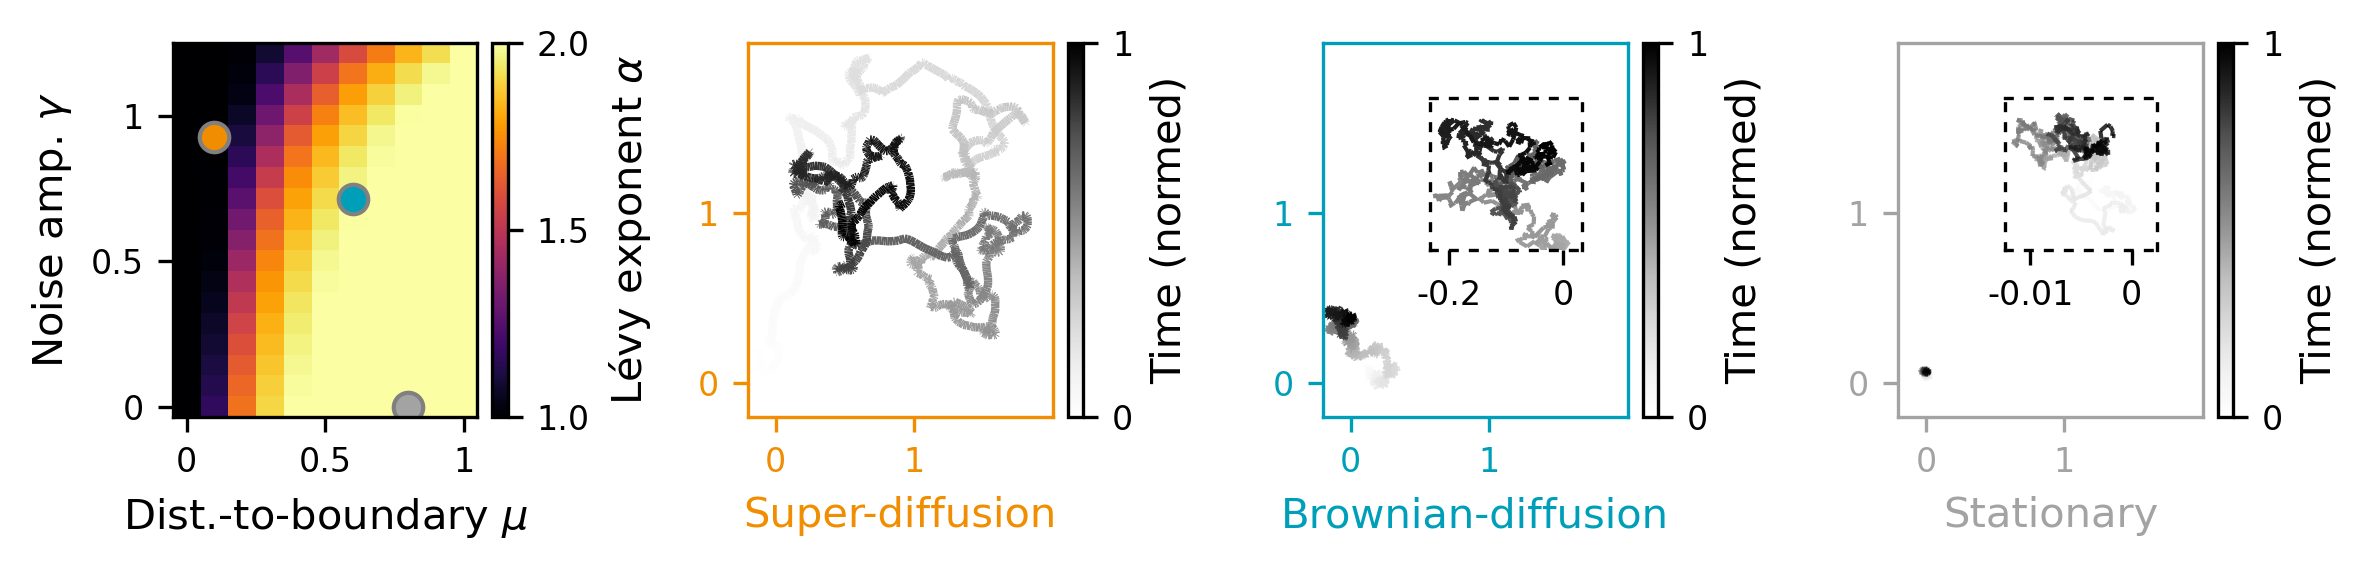

In [7]:

#if the data is not under '../data/Alpha.npy', generate it
if not os.path.exists('../data/Alpha.npy'):
    Alpha = TwoD_fun.get_Alpha(11, 21, True)
    np.save('./data/Alpha.npy', Alpha)
else:
    Alpha = np.load('../data/Alpha.npy')[0:-3,:,:]
Alpha = np.mean(Alpha, axis=2)


#init a figure with gridspec
fig = plt.figure(figsize=(8,2), dpi= 300)
gs = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,1], height_ratios=[1])

#set font size
labelsize = 10
ticksize = 8
#color
custom_color1 = '#F18D00'
custom_color2 = '#009FB9'
#black color
custom_color3 =  '#A3A3A3'

###########
#subplot 1#
###########

#plot the phase diagram in the first subplot
ax1 = plt.subplot(gs[0])

im = ax1.imshow(Alpha, origin='lower',cmap='inferno', aspect='auto')

#add colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(im, cax=cax)
cb.set_label(r'Lévy exponent $\alpha$', fontsize=labelsize)
cb.set_ticks([1, 1.5, 2])
cb.ax.tick_params(labelsize=ticksize)

#add markers for demonstration
ax1.scatter([1],[13], marker='o', c=custom_color1, edgecolors='grey', s=50, alpha=1)
ax1.scatter([6],[10], marker='o', c=custom_color2, edgecolors='grey', s=50, alpha=1)
ax1.scatter([8],[0], marker='o', c=custom_color3, edgecolors='grey', s=50, alpha=1)

#decorate the plot
ax1.set_xticks(np.array([0,5,10]))
ax1.set_xticklabels([0,0.5,1],fontsize = ticksize)
ax1.set_yticks(np.array([0, 7, 14]))
ax1.set_yticklabels([0, 0.5, 1],fontsize = ticksize)
ax1.set_xlabel(r'Dist.-to-boundary $\mu$', fontsize = labelsize)
ax1.set_ylabel(r'Noise amp. $\gamma$', fontsize=labelsize)

###########
#subplot 2#
###########

ax2 = plt.subplot(gs[1])

mu = 0.1
gamma = 15

#if not exists './data/center_trace' + str(mu) + '_' + str(gamma) + '.npy', generate it
if not os.path.exists('../data/center_trace' + str(mu) + '_' + str(gamma) + '.npy'):
    center_trace = bm.as_numpy(TwoD_fun.get_trace(mu, gamma, 100, 0.2, 1, 1, sigma_u=0.5))
    np.save('./data/center_trace' + str(mu) + '_' + str(gamma) + '.npy', center_trace)
else:
    center_trace = np.load('../data/center_trace' + str(mu) + '_' + str(gamma) + '.npy')

x = downsample(center_trace[200:-1,0]*-1)
y = downsample(center_trace[200:-1,1]*-1 + 0.05)

dydx = np.array((range(x.shape[0]))) / x.shape[0] # first derivative

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='Greys', norm=norm, linewidth=2, alpha=1)
lc.set_array(dydx)
line = ax2.add_collection(lc)
#label color as custom_color1
ax2.set_xlabel('Super-diffusion',fontsize=labelsize, color=custom_color1)
ax2.set_xticks([0, 1])
ax2.set_yticks([0, 1])
ax2.set_xticklabels([0, 1],fontsize=ticksize)
ax2.set_yticklabels([0, 1],fontsize=ticksize)
#set ticks color to custom_color3
ax2.tick_params(axis='x', colors=custom_color1)
ax2.tick_params(axis='y', colors=custom_color1)

ax2.set_xlim(-0.2, 2)
ax2.set_ylim(-0.2, 2)

#chnage the axis color to custom_color1
ax2.spines['bottom'].set_color(custom_color1)
ax2.spines['left'].set_color(custom_color1)
ax2.spines['top'].set_color(custom_color1)
ax2.spines['right'].set_color(custom_color1)

#add colorbar to ax4 to indicate the start and end of the trajectory
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(line, cax=cax)
cb.set_label('Time (normed)', fontsize=labelsize)
cb.set_ticks([0, 1])
cb.ax.tick_params(labelsize=ticksize)
        

###########
#subplot 3#
###########
ax3 = plt.subplot(gs[2])

mu = 0.8
gamma = 0.1

#if not exists './data/center_trace' + str(mu) + '_' + str(gamma) + '.npy', generate it
if not os.path.exists('../data/center_trace' + str(mu) + '_' + str(gamma) + '.npy'):
    center_trace = bm.as_numpy(TwoD_fun.get_trace(mu, gamma, 100, 0.2, 1, 1, sigma_u=0.5))
    np.save('./data/center_trace' + str(mu) + '_' + str(gamma) + '.npy', center_trace)
else:
    center_trace = np.load('../data/center_trace' + str(mu) + '_' + str(gamma) + '.npy')

x = downsample(center_trace[200:-1,0]*-3 + 0.15)
y = downsample(center_trace[200:-1,1]*-3 + 0.05)

dydx = np.array((range(x.shape[0]))) / x.shape[0] # first derivative

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='Greys', norm=norm, linewidth=2, alpha=1)
lc.set_array(dydx)
line = ax3.add_collection(lc)
ax3.set_xlabel('Brownian-diffusion',fontsize=labelsize, color=custom_color2)
ax3.set_xticks([0, 1])
ax3.set_yticks([0, 1])
ax3.set_xticklabels([0, 1],fontsize=ticksize)
ax3.set_yticklabels([0, 1],fontsize=ticksize)
#set ticks color to custom_color3
ax3.tick_params(axis='x', colors=custom_color2)
ax3.tick_params(axis='y', colors=custom_color2)

ax3.set_xlim(-0.2, 2)
ax3.set_ylim(-0.2, 2)

#add an insert in ax3
x2 = downsample(center_trace[200:-1, 0] * -10)
y2 = downsample(center_trace[200:-1, 1] * -10)

#add sub ax to ax3
subax3 = ax3.inset_axes([0.35, 0.35, 0.5, 0.6])

#change the axes to square
subax3.set_aspect('equal')

#set subax3 4 axes to dashed lines
subax3.spines['bottom'].set_linestyle((0, (2, 4)))
subax3.spines['left'].set_linestyle((0, (2, 4)))
subax3.spines['top'].set_linestyle((0, (2, 4)))
subax3.spines['right'].set_linestyle((0, (2, 4)))

dydx = np.array((range(x2.shape[0]))) / x2.shape[0]  # first derivative

points = np.array([x2, y2]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='Greys', norm=norm, linewidth=1, alpha=1.0)
lc.set_array(dydx)
subax3.add_collection(lc)

#set the ticks in subax3
subax3.set_xticks([-1,-0.4], [-0.2, 0], fontsize=ticksize)
subax3.set_yticks([], [], fontsize=ticksize)

#set the limits in subax3
subax3.set_xlim([-1.1, -0.3])
subax3.set_ylim([0.6, 1.4])

#chnage the axis color to custom_color2
ax3.spines['bottom'].set_color(custom_color2)
ax3.spines['left'].set_color(custom_color2)
ax3.spines['top'].set_color(custom_color2)
ax3.spines['right'].set_color(custom_color2)

#add colorbar to ax4 to indicate the start and end of the trajectory
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(line, cax=cax)
cb.set_label('Time (normed)', fontsize=labelsize)
cb.set_ticks([0, 1])
cb.ax.tick_params(labelsize=ticksize)
        

###########
#subplot 4#
###########

ax4 = plt.subplot(gs[3])

mu = 0.9
gamma = 0.01

#if not exists './data/center_trace' + str(mu) + '_' + str(gamma) + '.npy', generate it
if not os.path.exists('../data/center_trace' + str(mu) + '_' + str(gamma) + '.npy'):
    center_trace = bm.as_numpy(TwoD_fun.get_trace(mu, gamma, 100, 0.2, 1, 1, sigma_u=0.5))
    np.save('./data/center_trace' + str(mu) + '_' + str(gamma) + '.npy', center_trace)
else:
    center_trace = np.load('../data/center_trace' + str(mu) + '_' + str(gamma) + '.npy')

x = downsample(center_trace[200:-1,0]*-1)
y = downsample(center_trace[200:-1,1]*-1 + 0.05)

dydx = np.array((range(x.shape[0]))) / x.shape[0] # first derivative

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='Greys', norm=norm, linewidth=2, alpha=1)
lc.set_array(dydx)
line = ax4.add_collection(lc)
ax4.set_xlabel('Stationary', fontsize=labelsize,  color=custom_color3)
ax4.set_xticks([0, 1])
ax4.set_yticks([0, 1])
ax4.set_xticklabels([0, 1],fontsize=ticksize)
ax4.set_yticklabels([0, 1],fontsize=ticksize)
#set ticks color to custom_color3
ax4.tick_params(axis='x', colors=custom_color3)
ax4.tick_params(axis='y', colors=custom_color3)

ax4.set_xlim(-0.2, 2)
ax4.set_ylim(-0.2, 2)

x2 = downsample(center_trace[200:-1, 0] * -10)
y2 = downsample(center_trace[200:-1, 1] * -10)

#add sub ax to ax3
subax4 = ax4.inset_axes([0.35, 0.35, 0.5, 0.6])

#change the axes to square
subax4.set_aspect('equal')

#set subax4 4 axes to dashed lines
subax4.spines['bottom'].set_linestyle((0, (2, 4)))
subax4.spines['left'].set_linestyle((0, (2, 4)))
subax4.spines['top'].set_linestyle((0, (2, 4)))
subax4.spines['right'].set_linestyle((0, (2, 4)))
        

#make the axes bigger
dydx = np.array((range(x2.shape[0]))) / x2.shape[0]  # first derivative

points = np.array([x2, y2]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='Greys', norm=norm, linewidth=1, alpha=0.8)
lc.set_array(dydx)
subax4.add_collection(lc)

#set the ticks in subax3
subax4.set_xticks([-0.2,0.2],[-0.01,0], fontsize=ticksize)
subax4.set_yticks([0.7, 1.2], [0.3, 0.4], fontsize=ticksize)

#set the limits in subax3
subax4.set_xlim([-0.3, 0.3])
subax4.set_ylim([-0.25, 0.35])

#chnage the axis color to custom_color2
ax4.spines['bottom'].set_color(custom_color3)
ax4.spines['left'].set_color(custom_color3)
ax4.spines['top'].set_color(custom_color3)
ax4.spines['right'].set_color(custom_color3)

#add colorbar to ax4 to indicate the start and end of the trajectory
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(line, cax=cax)
cb.set_label('Time (normed)', fontsize=labelsize)
cb.set_ticks([0, 1])
cb.ax.tick_params(labelsize=ticksize)
       
plt.tight_layout()      
        
#save the figure
plt.savefig('./Fig4_various_replay_dynamics_1.pdf', dpi=300)

### 2, plot theoretcal results and simulations results, as well as the stats

In [2]:
def get_mean_var(x,y,interval):
    delta = np.sqrt((x[interval:]-x[:-interval])**2 + (y[interval:]-y[:-interval])**2)
    return [[np.mean(delta),np.std(delta)]]

def f_1(x, A, B):
    return A*x + B

sigma_m = 0.014037834499171687 , m_0 =  0.99


Predict 10200 steps: : 100%|██████████| 10200/10200 [00:03<00:00, 3056.88it/s]


sigma_m = 0.002835926161448825 , m_0 =  0.19999999999999996


Predict 10200 steps: : 100%|██████████| 10200/10200 [00:03<00:00, 3108.03it/s]


sigma_m = 0.014037834499171687 , m_0 =  0.99


Predict 10200 steps: : 100%|██████████| 10200/10200 [00:03<00:00, 3075.52it/s]


sigma_m = 0.002835926161448825 , m_0 =  0.19999999999999996


Predict 10200 steps: : 100%|██████████| 10200/10200 [00:03<00:00, 3081.19it/s]


sigma_m = 1.417963080724414e-05 , m_0 =  0.010000000000000009


Predict 10200 steps: : 100%|██████████| 10200/10200 [00:03<00:00, 3111.65it/s]


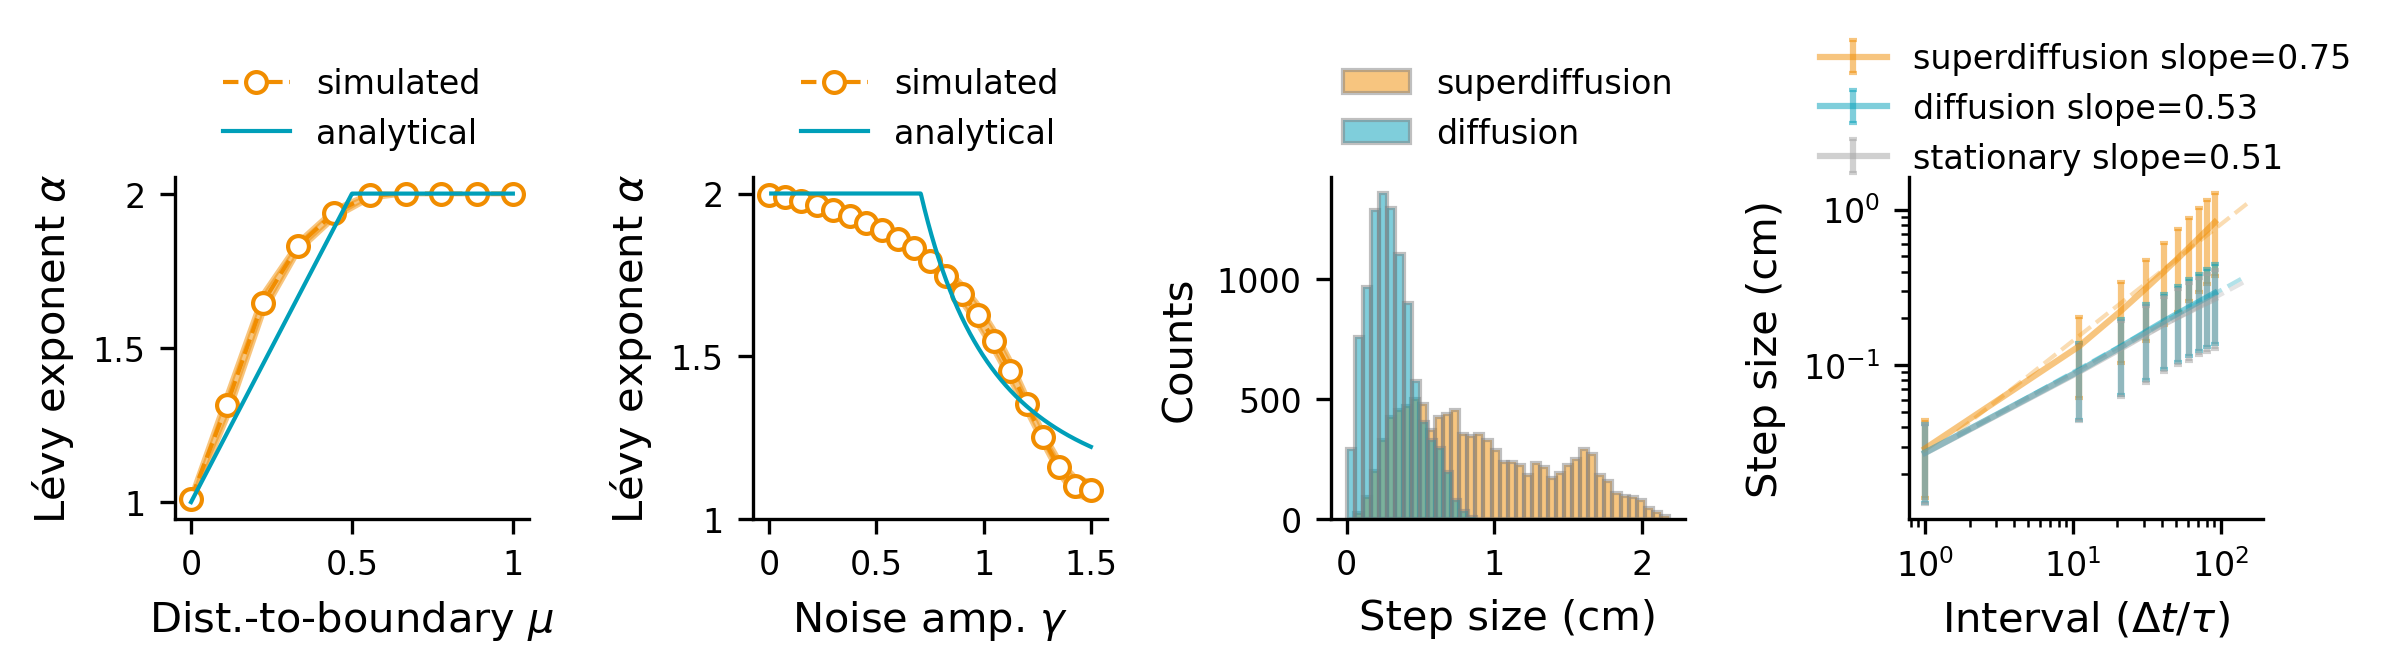

In [5]:
Alpha = np.load('../data/Alpha.npy')[:,1:,:]
#print(Alpha.shape)
Alpha_mean = np.mean(Alpha,axis = 2)
Alpha_std = np.std(Alpha, axis = 2)
#print(Alpha_std)


mu = np.linspace(0, 1, Alpha.shape[1])
mu_theory = np.linspace(0, 1, 1000)
mu_theory_ = np.minimum(2, 1 + 2 * mu_theory) # gamma = 1

gamma = np.linspace(0, 1.5, Alpha.shape[0])
gamma_theory = np.linspace(0.01, 1.5, 1000)
gamma_theory_ = np.minimum(2, 1 + 0.5 / np.square(gamma_theory)) # mu = 0.25

#init a figure with gridspec
fig = plt.figure(figsize=(8,2.5), dpi= 300)
gs = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,1], height_ratios=[1])

#set font size
labelsize = 10
ticksize = 8
#color
custom_color1 = '#F18D00'
custom_color2 = '#009FB9'
#black color
custom_color3 =  '#A3A3A3'


###########
#subplot 1#
###########

#plot the phase diagram in the first subplot
ax1 = plt.subplot(gs[0])

ax1.plot(mu, Alpha_mean[9,:], 
         marker='o', markersize=5, markerfacecolor='white', 
         linestyle='--', linewidth = 1,
         color=custom_color1, label = 'simulated')
ax1.fill_between(mu, Alpha_mean[9,:] - Alpha_std[9,:], Alpha_mean[9,:] + Alpha_std[9,:],
                 color= custom_color1, alpha=0.5)

ax1.plot(mu_theory, mu_theory_,  
         linestyle='-', linewidth=1,
         color=custom_color2, label = 'analytical')

#label
ax1.set_ylabel(r'Lévy exponent $\alpha$', fontsize=labelsize)
ax1.set_xlabel(r'Dist.-to-boundary $\mu$', fontsize=labelsize)
#ticks
ax1.set_xticks(np.array([0, 0.5, 1]))
ax1.set_yticks(np.asarray([1,1.5,2]))
ax1.set_xticklabels([0,0.5,1],fontsize = ticksize)
ax1.set_yticklabels([1,1.5,2],fontsize = ticksize)
#legend put legend  below x label
ax1.legend(fontsize=ticksize, frameon=False, loc='center', bbox_to_anchor=(0.5, 1.2))
#remove right and up axiss
ax1.spines['right'].set_visible(False)   
ax1.spines['top'].set_visible(False)
#set tick size to ticksize  
ax1.tick_params(axis='both', which='major', labelsize=ticksize)

###########
#subplot 2#
###########

#plot the phase diagram in the first subplot
ax2 = plt.subplot(gs[1])

#plt.errorbar(gamma, Alpha_mean[:,3],Alpha_std[:,3],fmt='o', markersize=3, markerfacecolor='white',linestyle = '-',color = 'k', label = 'simulated')
ax2.plot(gamma, Alpha_mean[:,3], 
         marker='o', markersize=5, markerfacecolor='white', 
         linestyle='--', linewidth=1, 
         color=custom_color1, label = 'simulated')
ax2.fill_between(gamma, Alpha_mean[:,3] - Alpha_std[:,3], Alpha_mean[:,3] + Alpha_std[:,3],
                 color=custom_color1, alpha=0.5)
ax2.plot(gamma_theory, gamma_theory_, 
         linestyle='-', linewidth=1, 
         color=custom_color2, label = 'analytical',)

#label
ax2.set_ylabel(r'Lévy exponent $\alpha$', fontsize=labelsize)
ax2.set_xlabel(r'Noise amp. $\gamma$', fontsize=labelsize)
#ticks
ax2.set_xticks(np.array([0, 0.5, 1, 1.5]))
ax2.set_yticks(np.asarray([1,1.5,2]))
ax2.set_xticklabels([0,0.5,1,1.5],fontsize = ticksize)
ax2.set_yticklabels([1,1.5,2],fontsize = ticksize)
#legend put legend  below x label
ax2.legend(fontsize=ticksize, frameon=False, loc='center', bbox_to_anchor=(0.5, 1.2))

#remove right and up axiss
ax2.spines['right'].set_visible(False)   
ax2.spines['top'].set_visible(False)   
#set tick size to ticksize  
ax2.tick_params(axis='both', which='major', labelsize=ticksize)

###########
#subplot 3#
###########

#plot levy flight and brownian motion step size histogram
ax3 = plt.subplot(gs[2])

step=100 #the step amount for calculating the step size

mu=0.01
gamma=2
bm.random.seed(1)
center_trace = bm.as_numpy(TwoD_fun.get_trace(mu, gamma , 100, 0.2, 1, 100))
stepsize = np.sqrt(np.sum(np.square(center_trace[:-step, :] - center_trace[step:, :]), axis=1))
stepsize = stepsize[199:]

#set 40 bins from min to max
bins = np.linspace(np.min(stepsize), np.max(stepsize), 40)
#getbinsize
binsize = bins[1] - bins[0]

ax3.hist(stepsize, alpha=0.5, bins=bins, color=custom_color1, edgecolor='grey', label='superdiffusion')

mu=0.8
gamma=2
bm.random.seed(1)
center_trace = bm.as_numpy(TwoD_fun.get_trace(mu, gamma , 100, 0.2, 1, 100))
stepsize = np.sqrt(np.sum(np.square(center_trace[:-step, :] - center_trace[step:, :]), axis=1))
stepsize = stepsize[199:]

#set binsize according to the binsize of superdiffusion, with min and max calculated from the current stepsize
bins = np.arange(np.min(stepsize), np.max(stepsize), binsize)

ax3.hist(stepsize, alpha=0.5, bins=bins, color=custom_color2, edgecolor='grey',label='diffusion')

#legend put legend  below x label
ax3.legend(fontsize=ticksize, frameon=False, loc='center', bbox_to_anchor=(0.5, 1.2))
#change y ticks to scientific notation， move the scientific notation a bit left
#ax3.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

#label
ax3.set_xlabel('Step size (cm)', fontsize=labelsize)
ax3.set_ylabel('Counts', fontsize=labelsize)

#set upper and right axis invisible
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

#set x ticks from meters to centimeters
ax3.set_xticks([0.0, 0.01, 0.02])
ax3.set_xticklabels([0, 1, 2],fontsize = ticksize)
#set tick size to ticksize  
ax3.tick_params(axis='both', which='major', labelsize=ticksize)

###########
#subplot 4#
###########

#plot the phase diagram in the first subplot
ax4 = plt.subplot(gs[3])
mu=0.01
gamma=2
bm.random.seed(1)
center_trace = bm.as_numpy(TwoD_fun.get_trace(mu, gamma, 100, 0.2, 1, 100, sigma_u=0.5))

ans = []
interval_list = np.array(range(1,100,10))
for interval in interval_list:
    ans += get_mean_var(center_trace[200:-1, 0],center_trace[200:-1, 1],interval)
ans = np.array(ans)

x0 = np.log(interval_list)
y0 = np.log(ans[:,0])
A1, B1 = optimize.curve_fit(f_1, x0, y0)[0]
x1 = np.log(interval_list) + 0.5
y1 = A1 * x1 + B1
ax4.plot(np.exp(x1), np.exp(y1), '--', linewidth=1, color = custom_color1, alpha = 0.3)

ax4.errorbar(interval_list,ans[:,0],ans[:,1],
             label = 'superdiffusion slope='+str(round(A1,2)), 
             color = custom_color1, capsize=1, alpha = 0.5)   

mu=0.8
gamma=2
bm.random.seed(1)
center_trace = bm.as_numpy(TwoD_fun.get_trace(mu, gamma, 100, 0.2, 1, 100, sigma_u=0.5))

ans = []
interval_list = np.array(range(1,100,10))
for interval in interval_list:
    ans += get_mean_var(center_trace[200:-1, 0],center_trace[200:-1, 1],interval)
ans = np.array(ans)

x0 = np.log(interval_list)
y0 = np.log(ans[:,0])
A1, B1 = optimize.curve_fit(f_1, x0, y0)[0]
x1 = np.log(interval_list) + 0.5
y1 = A1 * x1 + B1
ax4.plot(np.exp(x1), np.exp(y1), '--', linewidth=1, color = custom_color2, alpha = 0.3)

ax4.errorbar(interval_list,ans[:,0],ans[:,1],
             label = 'diffusion slope='+str(round(A1,2)), 
             color = custom_color2, capsize=1, alpha = 0.5)

mu=0.99
gamma=0.2
bm.random.seed(1)
center_trace = bm.as_numpy(TwoD_fun.get_trace(mu, gamma, 100, 0.2, 1, 100, sigma_u=0.5))

ans = []
interval_list = np.array(range(1,100,10))
for interval in interval_list:
    ans += get_mean_var(center_trace[200:-1, 0],center_trace[200:-1, 1],interval)
ans = np.array(ans)

x0 = np.log(interval_list)
y0 = np.log(ans[:,0])
A1, B1 = optimize.curve_fit(f_1, x0, y0)[0]
x1 = np.log(interval_list) + 0.5
y1 = A1 * x1 + B1
ax4.plot(np.exp(x1), np.exp(y1), '--', linewidth=1, color = custom_color3, alpha = 0.3)

ax4.errorbar(interval_list,ans[:,0],ans[:,1],
             label = 'stationary slope='+str(round(A1,2)), 
             color = custom_color3, capsize=1, alpha = 0.5) 

#log-log scale of ax4 and equal axis
ax4.set_xscale('log')
ax4.set_yscale('log')
#ax4.set_aspect('equal')

ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

ax4.legend(fontsize=ticksize, frameon=False, loc='center', bbox_to_anchor=(0.5, 1.2))

ax4.set_xlabel(r'Interval $(\Delta t/\tau)$',fontsize = labelsize)
ax4.set_ylabel('Step size (cm)',fontsize = labelsize)

#replace the y ticks from meter to cm
ax4.set_yticks([0.001,0.01])
ax4.set_yticklabels(['$10^{-1}$', '$10^0$'])
#set tick size to ticksize  
ax4.tick_params(axis='both', which='major', labelsize=ticksize)


plt.tight_layout()

#clear all the variables
plt.savefig('./Fig4_various_replay_dynamics_2.pdf', dpi=300)
